   area  price  predicted_price
0  2600  55000     53366.438356
1  3000  56500     58797.945205
2  3200  61000     61513.698630
3  3600  68000     66945.205479
4  4000  72500     72376.712329


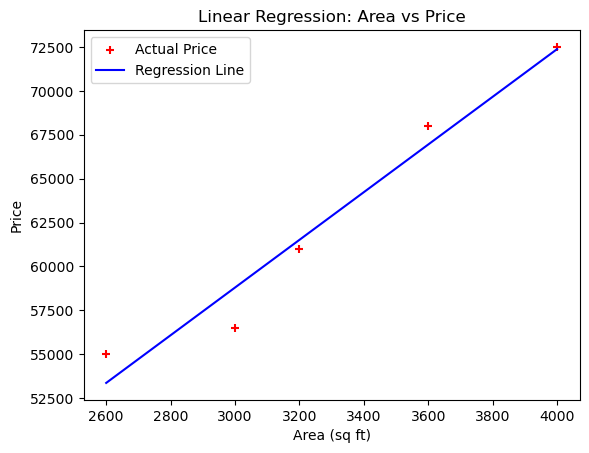

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
file_path = "homeprices.csv"  
df = pd.read_csv(file_path)

# Prepare the data for linear regression
X = df[['area']]  # Independent variable (area)
y = df['price']   # Dependent variable (price)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the prices of homes with the given areas in the dataset
df['predicted_price'] = model.predict(X)

print(df)

# Visualize the data and the regression line
plt.scatter(df['area'], df['price'], color='red', marker='+', label='Actual Price')
plt.plot(df['area'], df['predicted_price'], color='blue', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.show()


Predicted price for home with area 5000 sq ft: 85955.48
Predicted price for home with area 8000 sq ft: 126691.78
Predicted price for home with area 9000 sq ft: 140270.55


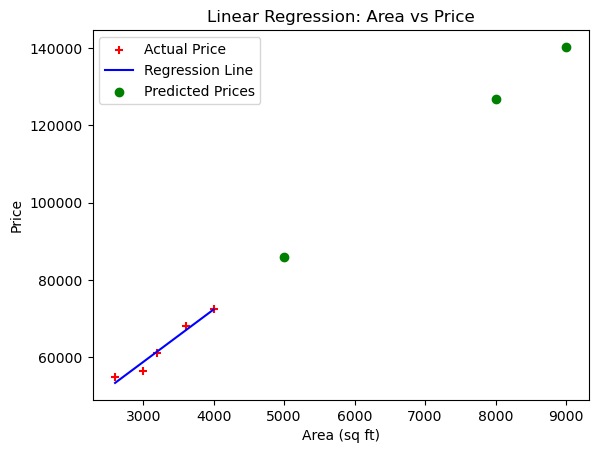

In [11]:
# TASK2
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
file_path = "homeprices.csv"  # Replace with the path to your uploaded file
df = pd.read_csv(file_path)

# Prepare the data for linear regression
X = df[['area']]  # Independent variable (area)
y = df['price']   # Dependent variable (price)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the prices of homes with specific areas
# Ensure input is provided as a DataFrame or structured array
areas_to_predict = pd.DataFrame({'area': [5000, 8000, 9000]})
predicted_prices = model.predict(areas_to_predict)

# Print the predicted prices
for area, price in zip(areas_to_predict['area'], predicted_prices):
    print(f"Predicted price for home with area {area} sq ft: {price:.2f}")

# Visualize the data, predictions, and regression line
plt.scatter(df['area'], df['price'], color='red', marker='+', label='Actual Price')
plt.plot(df['area'], model.predict(X), color='blue', label='Regression Line')
plt.scatter(areas_to_predict['area'], predicted_prices, color='green', marker='o', label='Predicted Prices')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.show()


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('AnimalDataset.csv')

# Feature and target
X = df.drop('Species', axis=1)  # Features
y = df['Species']  # Target: Species

# Encode categorical features using LabelEncoder
X = X.apply(LabelEncoder().fit_transform)  # Encode all categorical features in X

# Encode the target variable 'Species'
y = LabelEncoder().fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 0.00%


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('AnimalDataset.csv')

# Check column names to ensure 'Size' exists
print(df.columns)

# Encode categorical columns (Color Pattern, Activity Time, Habitat)
label_encoder = LabelEncoder()
df['Color Pattern'] = label_encoder.fit_transform(df['Color Pattern'])
df['Activity Time'] = label_encoder.fit_transform(df['Activity Time'])
df['Habitat'] = label_encoder.fit_transform(df['Habitat'])

# Ensure 'Size' column exists before applying the mapping
if 'Size' in df.columns:
    # Map Size to numeric values: Small = 0, Medium = 1, Large = 2
    size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
    df['Size'] = df['Size'].map(size_mapping)
else:
    print("'Size' column is missing from the dataset.")

# Feature variables (X) and target variable (y)
X = df[['Color Pattern', 'Activity Time', 'Habitat']]  # Features: Color Pattern, Activity Time, Habitat
y = df['Size']  # Target: Size

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test).round()  # Round the predictions to nearest integer

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Show the predicted and actual values
print(f'Predicted Size: {y_pred}')
print(f'Actual Size: {y_test.values}')


Index(['Animal Size', 'Color Pattern', 'Activity Time', 'Habitat', 'Species'], dtype='object')
'Size' column is missing from the dataset.


KeyError: 'Size'